In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

# Turn interactive plotting off
plt.ioff()

#Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
from gradient_descent import GradientDescent
from scheduler import *

In [9]:
functions = [
    lambda x: x ** 2 + 0.5 *x,
    lambda x: x * sin(x ** 2),
    lambda x: x ** 3 - 10 * x ** 2 + x
]

derivatives = [
    lambda x: 2 * x + 0.5,
    lambda x: sin(x ** 2) + 2 * x ** 2 * cos(x ** 2),
    lambda x: 3 * x ** 2 - 20 * x + 1
]

function_names = [
    'x^2 + x/2',
    'x * sin(x^2)',
    'x^3 - 10x^2 + x'
]

from_xs = [
    -2, 
    0,
    -3
]

to_xs = [
    None,
    3,
    8
]

initial_point = 2

## Задание 1. Реализуйте градиентный спуск с постоянным шагом. Исследуйте сходимость при различных значениях шага
Для этого задания были реализованы классы GradientDescent, ConstLRScheduler. 

Processing function x^2 + x/2


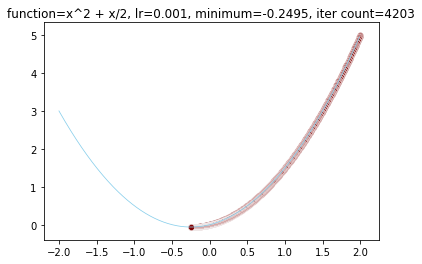

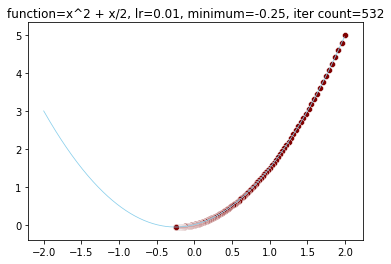

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Processing function x * sin(x^2)


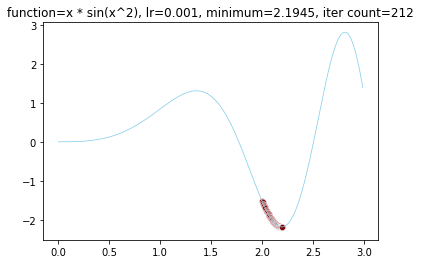

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


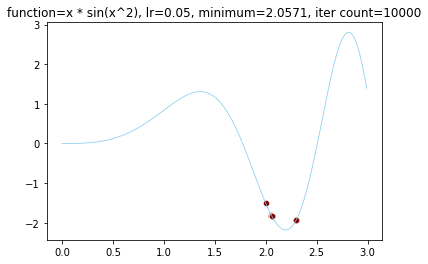

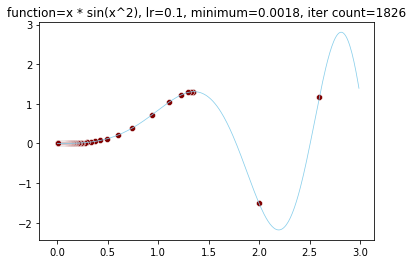

Processing function x^3 - 10x^2 + x


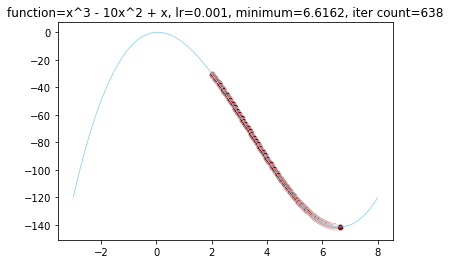

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


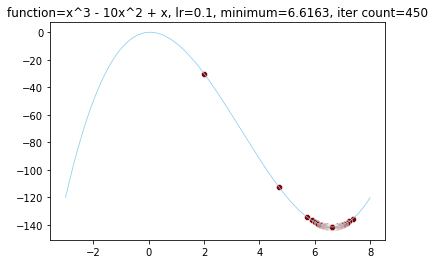

In [4]:
for i, (function, derivative, function_name, from_x, to_x) in enumerate(zip(functions, derivatives, function_names, from_xs, to_xs)):
    print(f'Processing function {function_name}')
    for lr in [0.001, 0.01, 0.05, 0.1]:
        gd = GradientDescent(function=function,
                             derivative=derivative,
                             iterations=10000,
                             initial_point=np.array([initial_point]),
                             epsilon=1e-6,
                             scheduler=ConstLRScheduler(lr))
        answer, iterations_count = gd.optimize()
        gd.plot_trace(title=f'function={function_name}, lr={lr}, minimum={round(answer[0], 4)}, iter count={iterations_count}',
                      with_function=True, 
                      animate='auto', 
                      filename=f'gifs/ani_{i}_{lr}.gif',
                      from_x=from_x,
                      to_x=to_x
                      )
    print('====================================')

## Задание 2. Подберите функцию изменения шага (learning rate scheduling), чтобы улучшить сходимость.
В качестве функции изменения шага была выбрана экспоненциальная функция.

MovieWriter ffmpeg unavailable; using Pillow instead.


MovieWriter ffmpeg unavailable; using Pillow instead.


MovieWriter ffmpeg unavailable; using Pillow instead.


MovieWriter ffmpeg unavailable; using Pillow instead.


MovieWriter ffmpeg unavailable; using Pillow instead.


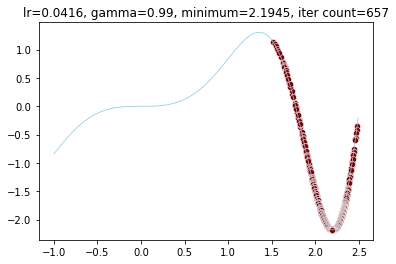

In [10]:
gammas = [0.1, 0.2, 0.5, 0.75, 0.9, 0.99]
lr = 0.08
period = 10

for gamma in gammas:
    scheduler = ExpLRScheduler(lr=lr, gamma=gamma, period=period)
    gd = GradientDescent(function=functions[1], 
                         derivative=derivatives[1], 
                         initial_point=np.array([initial_point]),
                         epsilon=1e-06,
                         iterations=100000,
                         scheduler=scheduler)
    answer, iterations_count = gd.optimize()
    gd.plot_trace(title=f'lr={round(scheduler.lr, 4)}, gamma={gamma}, minimum={round(answer[0], 4)}, iter count={iterations_count}', 
                  with_function = True, 
                  animate='auto', 
                  filename=f'gifs/gd_{gamma}.gif', 
                  plot_one_point=True,
                  from_x=-1,
                  to_x=2.5)